In [41]:
arr = np.zeros((3,5))
# np.reshape(arr, (4,4)) # 요소 갯수 안맞으면 에러남
# np.resize(arr, (4,4)) # 빈 값을 0으로 채움


arr = np.zeros((3,5,6,8,2,4))
# np.reshape(arr, (4,-1)) # -1하면 지가 알아서 갯수를 채워줌

arr = np.arange(8)
#([[0, 1, 2, 3],
# [4, 5, 6, 7]])
arr = np.reshape(arr, (2,4))
#([[0, 1],
#  [2, 3],
#  [4, 5],
#  [6, 7]])
# arr = np.reshape(arr, (4,2))
arr.T

array([0, 1, 2, 3, 4, 5, 6, 7])

In [2]:
import numpy as np
import tensorflow as tf
# 텐서플로우에 있는 resnet 모델 불러오기
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
# 텐서플로우에 있는 사전처리 이미지 모듈
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
예측결과 : [('n02325366', 'wood_rabbit', 0.52316034), ('n02326432', 'hare', 0.41229272), ('n01877812', 'wallaby', 0.02008422), ('n02356798', 'fox_squirrel', 0.019029489), ('n02361337', 'marmot', 0.0050069373)]


<Figure size 500x800 with 0 Axes>

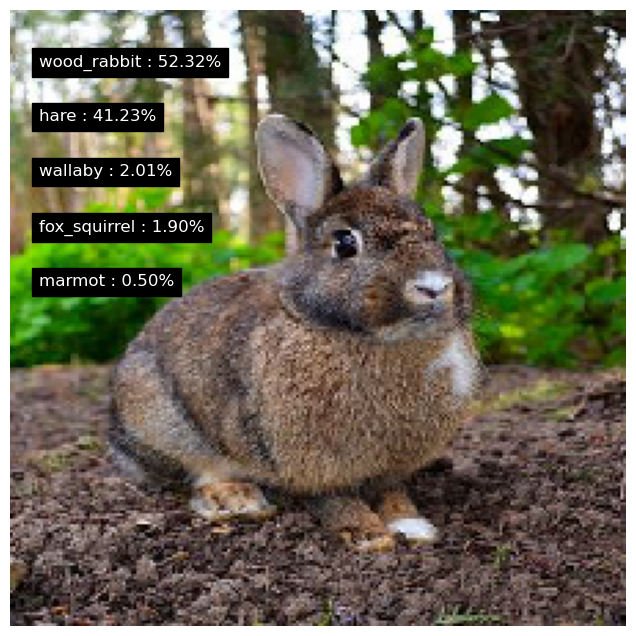

In [58]:
# 기존에는 Sequential을 사용해서 모델 생성
# 지금은 미리 만들어진 ResNet50이라는 모델을 그대로 사용
# ResNet50 모델 가져오기 : w => 이미지넷 데이터셋을 학습한 가중치
model = ResNet50(weights='imagenet')

# 이미지 가져오기
img_path = 'rabbit.jpg'
img = image.load_img(img_path, target_size=(224,224))
fig = plt.figure(figsize=(5,8))

# 데이터 전처리
img_arr = image.img_to_array(img) # 이미지를 np의 array로 변환
# print(img_arr.shape) # (224, 224, 3) 

# Reshape(이미지 갯수, width, height, channel갯수)
img_arr = np.reshape(img_arr, (1, 224, 224, 3)) # 앞에 장수에 대한 차원도 추가해서 (1, 224, 224, 3)으로 변환 => 필수사항
# print(img_arr.shape) # (1, 224, 224, 3)

# input data preprocess
img_arr = preprocess_input(img_arr)
# print(img_arr)

# 이미지 예측
preds = model.predict(img_arr)
# print(max(preds[0]))
# print(sum(preds[0]))
# 클래스 정보를 가져와서 클래스 아이디와 이름을 알려줌
top = decode_predictions(preds, top=5)[0]
print('예측결과 :',top)

# 이미지 예측 결과와 이미지 동시 출력
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis('off')

# 예측 결과를 이미지에 작성하는 코드
for i, val in enumerate(top):
    plt.text(10, 20 + (i * 20), f'{val[1]} : {val[-1]*100:.2f}%', color='white', backgroundcolor='black', fontsize=12)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
예측결과 : [('n02071294', 'killer_whale', 0.89213604), ('n02066245', 'grey_whale', 0.09994093), ('n01484850', 'great_white_shark', 0.0064386595), ('n02077923', 'sea_lion', 0.00037924797), ('n04347754', 'submarine', 0.00036192685)]


<Figure size 500x800 with 0 Axes>

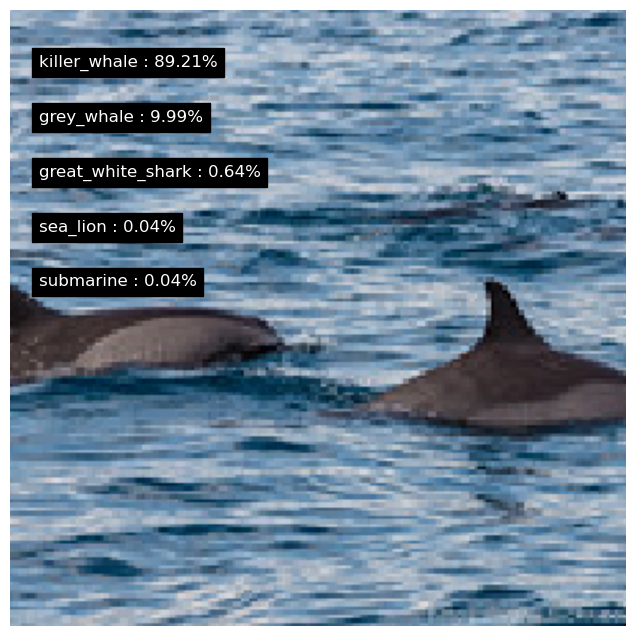

In [83]:
## 어제 받은 사진을 ResNet50 모델에 적용해봤다.

img_path = 'images/Dolphin/dolphin0.jpg'
img = image.load_img(img_path, target_size=(224,224))
fig = plt.figure(figsize=(5,8))

img_arr = image.img_to_array(img)
img_arr = np.reshape(img_arr, (1, 224, 224, 3))
img_arr = preprocess_input(img_arr)
preds = model.predict(img_arr)

top = decode_predictions(preds, top=5)[0]
print('예측결과 :',top)

# 이미지 예측 결과와 이미지 동시 출력
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis('off')

# 예측 결과를 이미지에 작성하는 코드
for i, val in enumerate(top):
    plt.text(10, 20 + (i * 20), f'{val[1]} : {val[-1]*100:.2f}%', color='white', backgroundcolor='black', fontsize=12)

plt.show()

In [174]:
## 어제 받은 사진을 ResNet50 모델에 적용해 함수로 만듬.
def printing(search_word):
    import random
    i = random.randrange(0,101)
    path_name=search_word[0].upper() + search_word[1:]
    print(path_name)
    img_path = 'images/' + str(path_name) + '/' + str(path_name.lower()) + str(i) + '.jpg'
    print(img_path)
    img = image.load_img(img_path, target_size=(224,224))
    fig = plt.figure(figsize=(5,8))
    
    img_arr = image.img_to_array(img)
    img_arr = np.reshape(img_arr, (1, 224, 224, 3))
    img_arr = preprocess_input(img_arr)
    preds = model.predict(img_arr)
    
    top = decode_predictions(preds, top=5)[0]
    print('예측결과 :',top)
    
    # 이미지 예측 결과와 이미지 동시 출력
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.axis('off')
    
    # 예측 결과를 이미지에 작성하는 코드
    for i, val in enumerate(top):
        plt.text(10, 20 + (i * 20), f'{val[1]} : {val[-1]*100:.2f}%', color='white', backgroundcolor='black', fontsize=12)
    
    return plt.show()

Rabbit
images/Rabbit/rabbit49.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
예측결과 : [('n02325366', 'wood_rabbit', 0.8378521), ('n02326432', 'hare', 0.16213936), ('n02328150', 'Angora', 5.2619603e-06), ('n02356798', 'fox_squirrel', 2.0333152e-06), ('n01877812', 'wallaby', 5.5073116e-07)]


<Figure size 500x800 with 0 Axes>

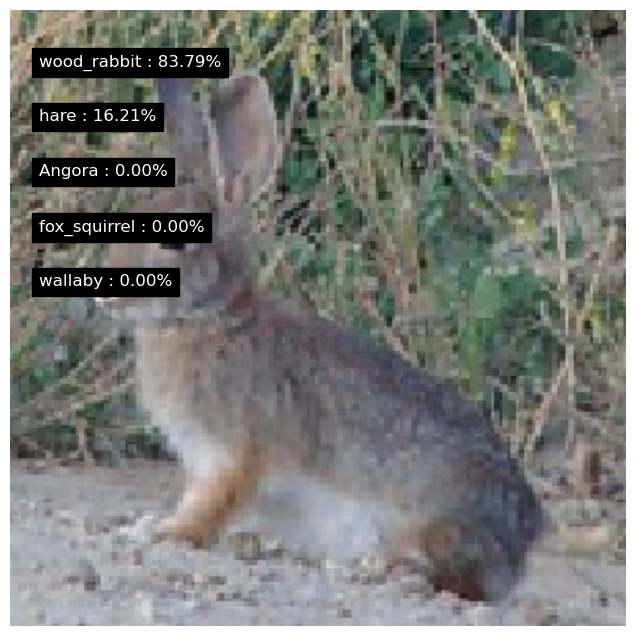

In [177]:
printing('rabbit')

검색어 찾아주는 함수 선언

In [87]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
import tensorflow as tf
import json

model = ResNet50(weights='imagenet')
# class index 정보 json 위치
class_idx = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"

# keras 모듈을 이용한 class index 데이터 받아오기
json_data = tf.keras.utils.get_file("imagenet_class_index.json", class_idx, cache_subdir='models')
## cache_subdir='models' : 다운로드한 파일을 캐시할 서브 디렉토리를 지정

# json 파일 열기 (f는 외부파일을 지칭하는 단어)
with open(json_data) as f:
    c_idx = json.load(f)

c_idx

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [94]:
'ten' in list(c_idx.items())[0][1][1]

True

In [171]:
def search_class(search_word):
    result = {}
    for idx, (id, name) in c_idx.items():
        if search_word in name:
            result[idx] = name
    
    print(f'검색결과 :\n{list(result.values())}')
    print(f'검색된 클래스 이름 수: {len(result)}')
    
    return result

In [173]:
search_class('conv')

검색결과 :
['convertible']
검색된 클래스 이름 수: 1


{'511': 'convertible'}

In [178]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_40 (InputLayer)   │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_40[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

강아지 견종 분류 모델

In [182]:
import tensorflow as tf
# Sequential 모델
from tensorflow.keras.models import Sequential
# Sequential 모델에 사용할 layers
from tensorflow.keras.layers import Flatten, Dense, Dropout, Rescaling
# Pretrained Model (사전 학습 모델)
from tensorflow.keras.applications.densenet import DenseNet121
# Optimizer
from tensorflow.keras.optimizers import Adam
# image file을 폴더별 dataset으로 불러오는 함수
from tensorflow.keras.utils import image_dataset_from_directory
# 파일 경로를 만들어주는 함수
import pathlib
# 데이터 경로 설정
path = pathlib.Path('dataset/images/')
# 데이터셋 전처리
# 데이터셋 가져오기(seed는 번호를 주면 고정된 값으로 가져옴)
train_data = image_dataset_from_directory(path, validation_split=0.2, 
                                          subset='training',
                                          seed=123,
                                          image_size=(224, 224),
                                          batch_size=16)

test_data = image_dataset_from_directory(path, validation_split=0.2, 
                                          subset='validation',
                                          seed=123,
                                          image_size=(224, 224),
                                          batch_size=16)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [183]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [186]:
## 사전학습된 모델 불러오기
# include_top=False는 완전연결층을 빼고 가져오라는 뜻이다.
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224,3))

## 분류기 모델 합치기
cnn_model = Sequential()

## 입력 이미지의 픽셀값 범위를 [0,1]로 조정합니다.
cnn_model.add(Rescaling(1.0/255))

## Sequential 모델에 base model 장착
cnn_model.add(base_model)

## Base_model 다음 영역 생성
## 1차원 형태로 변환
cnn_model.add(Flatten())

## Fully connected layer 생성
cnn_model.add(Dense(1024, activation='relu'))

## Drop Out layer 추가 (과적합 방지)
cnn_model.add(Dropout(0.75))

## 출력층 만들기
cnn_model.add(Dense(120, activation='softmax'))

In [191]:
# optimizer를 Adam으로 주면 learning_rate를 조절 할 수 있다. 
# learning_rate는 엄청 작게 줄 것!!
# sparse_categorical_crossentropy는 클래수 값이 커도 상관없이 여러 클래스에 대한 확률 값을 출력 (무리가 덜간다.)

cnn_model.compile(optimizer=Adam(learning_rate=0.000001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['acc'])

In [190]:
## 모델 학습
history = cnn_model.fit(train_data, epochs=50, 
                        validation_data=test_data,
                        verbose=2)

Epoch 1/50


KeyboardInterrupt: 

In [187]:
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ ?                           │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 6,953,856 (26.53 MB)

 Non-trainable params: 83,648 (326.75 KB)